<a href="https://colab.research.google.com/github/syauqidamario/dqlab/blob/main/Data%20Science%20Project%20Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Pengantar**

Suatu pagi kamu terbangun dari tidur dan mendapati ada sebuah e-mail masuk dari e-commerce idaman kamu. Kamu tau bahwa ini bukan sekedar email promosi biasa karena satu minggu lalu kamu baru saja menyelesaikan proses akhir rekruitment di perusahaan tersebut.

"SELAMAT BERGABUNG BERSAMA KAMI", sebuah kalimat yang memiliki arti mendalam setelah kamu berusaha mengejar cita-cita kamu untuk menjadi data scientist. Hingga akhirnya cita-cita kamu tercapai.

Hari pertama pun tiba, kamu menyelesaikan orientasi dan akhirnya bertemu dengan tim data scientist di perusahaan tersebut. Kamu mulai beradaptasi dan segera mendapatkan tugas pertama kamu sebagai seorang junior data scientist.

Perusahaan kamu sedang berusaha untuk mengenal lebih baik pelanggannya. Tujuannya agar perusahaan kamu dapat membuat strategi pemasaran yang lebih tepat dan juga efisien bagi tiap tiap pelanggan. Kamu di diberikan tugas agar dapat memberikan rekomendasi untuk menyelesaikan permasalahan tersebut.

Kamu teringat bahwa beberapa bulan sebelumnya kamu pernah belajar menghadapi permasalahan serupa di tempat kamu belajar. Salah satu teknik yang bisa dilakukan untuk mengenal lebih baik pelanggan kamu adalah dengan melakukan segmentasi pelanggan. Yaitu dengan mengelompokkan pelanggan-pelanggan yang ada berdasarkan kesamaan karakter dari pelanggan tersebut. Untuk melakukan hal tersebut kamu akan menggunakan teknik unsupervised machine learning.

Salah satunya teknik yang dapat digunakan adalah pengaplikasian machine learning menggunakan algoritma K-Prototypes.  Algoritma K-Prototypes merupakan gabungan dari K-Means dan juga K-Modes yang dapat digunakan untuk melakukan segmentasi dengan data.

Data yang digunakan memiliki entri-entri sebagai berikut:
1. Customer ID: Kode pelanggan dengan format campuran teks CUST- diikuti angka
2. Nama Pelanggan: Nama dari pelanggan dengan format teks tentunya
3. Jenis Kelamin: Jenis kelamin dari pelanggan, hanya terdapat dua isi data kategori yaitu Pria dan Wanita
4. Umur: Umur dari pelanggan dalam format angka
5. Profesi: Profesi dari pelanggan, juga bertipe teks kategori yang terdiri dari Wiraswasta, Pelajar, Professional, Ibu Rumah Tangga, dan Mahasiswa.
6. Tipe Residen: Tipe tempat tinggal dari pelanggan kita, untuk dataset ini hanya ada dua kategori: Cluster dan Sector.
7. Nilai Belanja Setahun: Merupakan total belanja yang sudah dikeluarkan oleh pelanggan tersebut.

In [1]:
!pip install kmodes
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes

import pickle
from pathlib import Path

In [2]:
# import dataset
df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/customer_segments.txt", sep="\t")

# menampilkan data
print(df.head())

  Customer_ID       Nama Pelanggan Jenis Kelamin  Umur       Profesi  \
0    CUST-001         Budi Anggara          Pria    58    Wiraswasta   
1    CUST-002     Shirley Ratuwati        Wanita    14       Pelajar   
2    CUST-003         Agus Cahyono          Pria    48  Professional   
3    CUST-004     Antonius Winarta          Pria    53  Professional   
4    CUST-005  Ibu Sri Wahyuni, IR        Wanita    41    Wiraswasta   

  Tipe Residen  NilaiBelanjaSetahun  
0       Sector              9497927  
1      Cluster              2722700  
2      Cluster              5286429  
3      Cluster              5204498  
4      Cluster             10615206  


In [3]:
# Melihat informasi data
df.info()
# Tips: Dalam setiap project machine learning, kita harus memahami informasi dasar dari data yang kita miliki sebelum melakukan analisa lebih lanjut. Dengan melakukan hal ini, kita bisa memastikan tipe data dari masing-masing kolom sudah benar, mengetahui apakah ada data null di tiap tiap kolom, dan juga mengetahui nama-nama kolom di dataset yang kita gunakan. Informasi ini nantinya akan menentukan proses apa yang perlu kita lakukan selanjutnya.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer_ID          50 non-null     object
 1   Nama Pelanggan       50 non-null     object
 2   Jenis Kelamin        50 non-null     object
 3   Umur                 50 non-null     int64 
 4   Profesi              50 non-null     object
 5   Tipe Residen         50 non-null     object
 6   NilaiBelanjaSetahun  50 non-null     int64 
dtypes: int64(2), object(5)
memory usage: 2.9+ KB


**Eksplorasi data** - menyiapkan data dan melihat informasi dasar dari data yang kamu miliki. Lakukan eksplorasi data untuk lebih mengenal dataset yang akan digunakan.Lakukan juga eksplorasi untuk data numerik dan juga data kategorikal.

<ipython-input-4-2d023c57b6f3>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[kol], ax = axs[i][1])
<ipython-input-4-2d023c57b6f3>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[kol], ax = axs[i][1])


  adjustable: {'box', 'datalim'}
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  anchor: (float, float) or {'C', 'SW', 'S', 'SE', 'E', 'NE', ...}
  animated: bool
  aspect: {'auto', 'equal'} or float
  autoscale_on: bool
  autoscalex_on: unknown
  autoscaley_on: unknown
  axes_locator: Callable[[Axes, Renderer], Bbox]
  axisbelow: bool or 'line'
  box_aspect: float or None
  clip_box: `~matplotlib.transforms.BboxBase` or None
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  facecolor or fc: :mpltype:`color`
  figure: `~matplotlib.figure.Figure` or `~matplotlib.figure.SubFigure`
  forward_navigation_events: bool or "auto"
  frame_on: bool
  gid: str
  in_layout: bool
  label: object
  mouseover: bool
  navigate: bool
  navigate_mode: unknown
  path_effects: list of `.AbstractPathEffect`
  picker: None or bool or float or 

<Figure size 640x480 with 0 Axes>

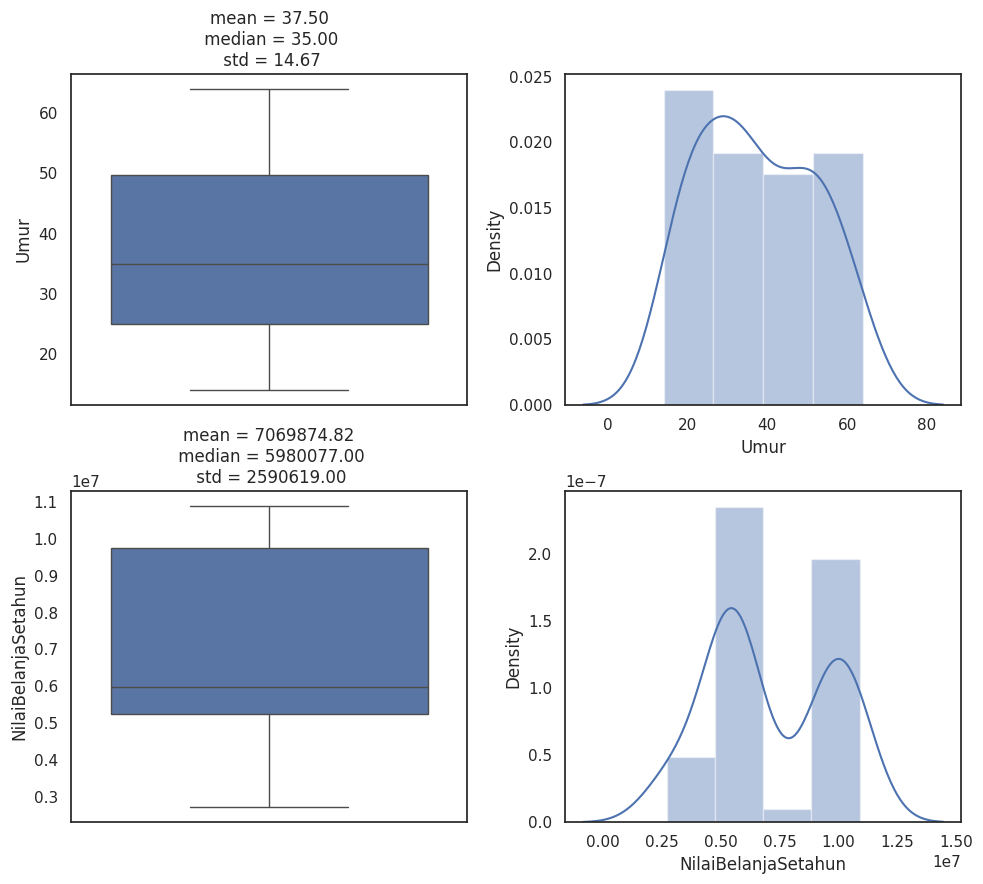

In [4]:
# Eksplorasi data numerik
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')
import pandas as pd
df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/customer_segments.txt", sep="\t")
plt.clf()

# Fungsi untuk membuat plot
def observasi_num(features):
    fig, axs = plt.subplots(2, 2, figsize=(10, 9))
    for i, kol in enumerate(features):
	    sns.boxplot(df[kol], ax = axs[i][0])
	    sns.distplot(df[kol], ax = axs[i][1])
	    axs[i][0].set_title('mean = %.2f\n median = %.2f\n std = %.2f'%(df[kol].mean(), df[kol].median(), df[kol].std()))
    plt.setp(axs)
    plt.tight_layout()
    plt.show()

# Memanggil fungsi untuk membuat Plot untuk data numerik
kolom_numerik = ['Umur','NilaiBelanjaSetahun']
observasi_num(kolom_numerik)

  adjustable: {'box', 'datalim'}
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  anchor: (float, float) or {'C', 'SW', 'S', 'SE', 'E', 'NE', ...}
  animated: bool
  aspect: {'auto', 'equal'} or float
  autoscale_on: bool
  autoscalex_on: unknown
  autoscaley_on: unknown
  axes_locator: Callable[[Axes, Renderer], Bbox]
  axisbelow: bool or 'line'
  box_aspect: float or None
  clip_box: `~matplotlib.transforms.BboxBase` or None
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  facecolor or fc: :mpltype:`color`
  figure: `~matplotlib.figure.Figure` or `~matplotlib.figure.SubFigure`
  forward_navigation_events: bool or "auto"
  frame_on: bool
  gid: str
  in_layout: bool
  label: object
  mouseover: bool
  navigate: bool
  navigate_mode: unknown
  path_effects: list of `.AbstractPathEffect`
  picker: None or bool or float or 

<Figure size 640x480 with 0 Axes>

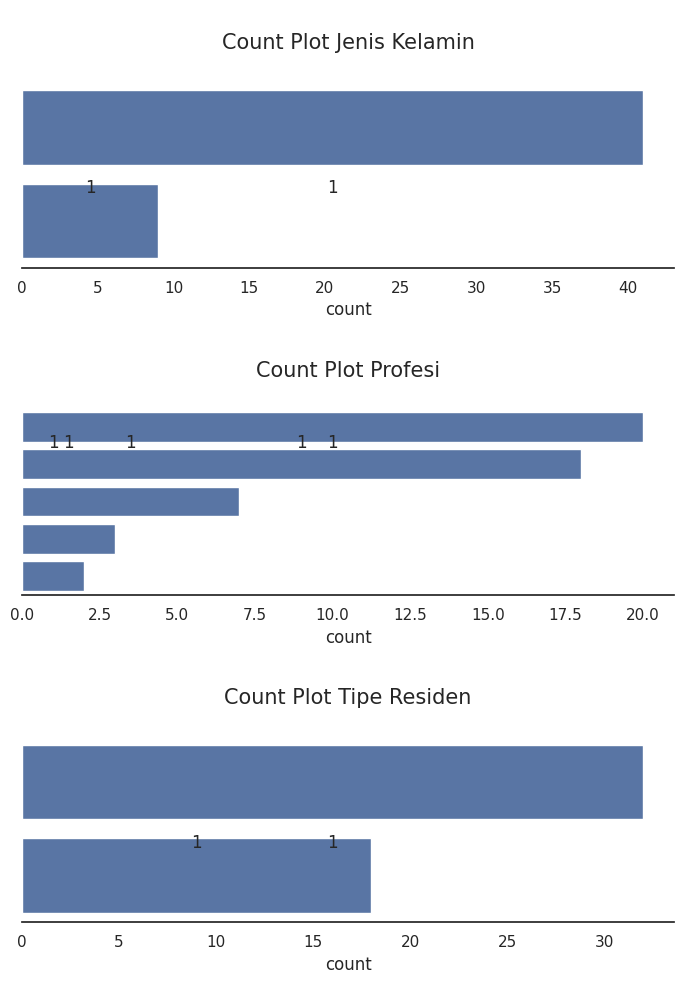

In [6]:
# Eksplorasi data kategorikal
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')
import pandas as pd
df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/customer_segments.txt", sep="\t")
plt.clf()

# Menyiapkan kolom kategorikal
kolom_kategorikal = ['Jenis Kelamin','Profesi','Tipe Residen']

# Membuat canvas
fig, axs = plt.subplots(3,1,figsize=(7,10))

# Membuat plot untuk setiap kolom kategorikal
for i, kol in enumerate(kolom_kategorikal):
    # Membuat Plot
    sns.countplot(df[kol], order = df[kol].value_counts().index, ax = axs[i])
    axs[i].set_title('\nCount Plot %s\n'%(kol), fontsize=15)

    # Memberikan anotasi
    for p in axs[i].patches:
        axs[i].annotate(format(p.get_height(), '.0f'),
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha = 'center',
                        va = 'center',
                        xytext = (0, 10),
                        textcoords = 'offset points')

    # Setting Plot
    sns.despine(right=True,top = True, left = True)
    axs[i].axes.yaxis.set_visible(False)
    plt.setp(axs[i])
    plt.tight_layout()

# Tampilkan plot
plt.show()